In [3]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu121


## Data Preparing & Loading

In [4]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

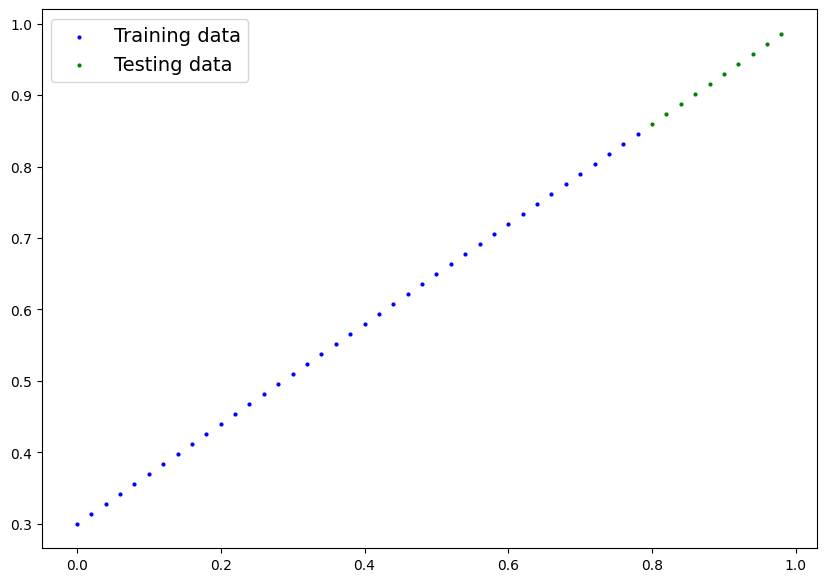

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

plot_predictions();

## Build Model

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                             requires_grad=True)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

torch.manual_seed(36)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.4704], requires_grad=True),
 Parameter containing:
 tensor([-0.0512], requires_grad=True)]

In [9]:
model.state_dict()

OrderedDict([('weights', tensor([0.4704])), ('bias', tensor([-0.0512]))])

In [10]:
with torch.inference_mode():
  y_preds = model(X_test)

print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\m{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:\mtensor([[0.3251],
        [0.3345],
        [0.3439],
        [0.3533],
        [0.3627],
        [0.3721],
        [0.3815],
        [0.3909],
        [0.4003],
        [0.4097]])


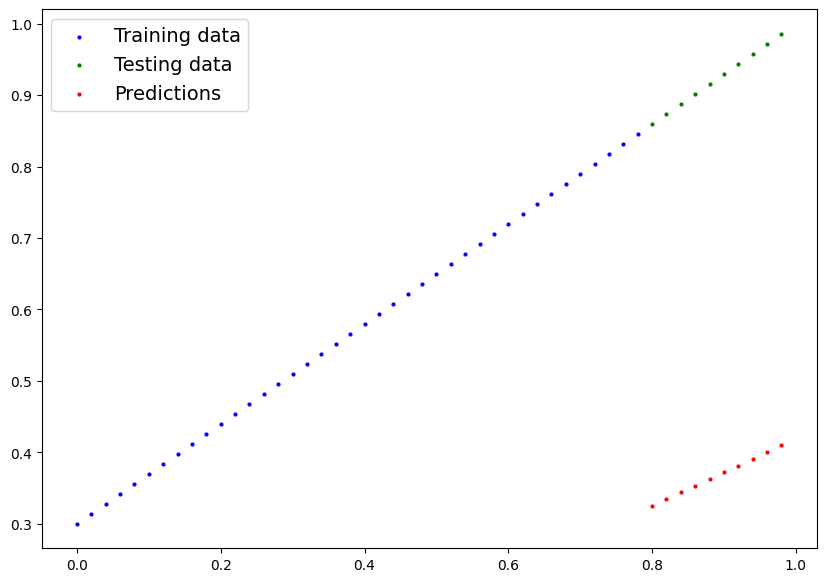

In [11]:
plot_predictions(predictions=y_preds)